In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from matplotlib.patches import ConnectionPatch

In [2]:
df = pd.read_csv(rf'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\ex.3\datasets\ds_salaries.csv', 
    index_col=0, 
    low_memory=False)
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.drop(columns=['salary', 'salary_currency'])
df['experience_level'] = df['experience_level'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['job_title'] = df['job_title'].astype('string')
df['employee_residence'] = df['employee_residence'].astype('category')
df['company_location'] = df['company_location'].astype('category')
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('string')
df['remote_ratio'] = df['remote_ratio'].astype('string')


In [3]:
types = (df
    .groupby('job_title', as_index=False)
    .company_location.count()
    .sort_values(by='company_location', ascending=True)
    .rename(columns={'company_location': 'count_examples'}))

types['scala'] = 500*(types['count_examples'] / types['count_examples'].max())

In [4]:
target_salaries = (df.loc[(df.company_size == 'L') & (df.work_year == 2022)]
        .drop(columns=['company_size', 'work_year']))

target_presential = (target_salaries.loc[df.remote_ratio == '0']
        .drop(columns=['remote_ratio']))

In [5]:
count_examples_per_ratio = (target_salaries
    .groupby('remote_ratio', as_index=False)
    .company_location.count()
    .sort_values(by='company_location', ascending=True)
    .rename(columns={'company_location': 'count_examples'}))

count_examples_per_experience_level = (target_presential
    .groupby('experience_level', as_index=False)
    .company_location.count()
    .sort_values(by='company_location', ascending=False)
    .rename(columns={'company_location': 'count_examples'}))

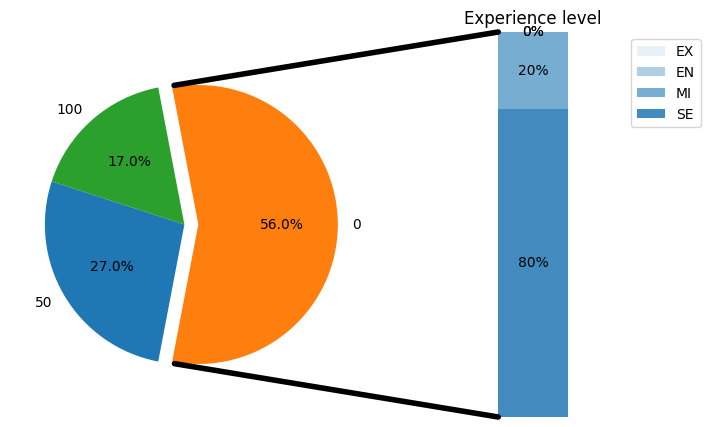

In [6]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = count_examples_per_ratio.remote_ratio
explode = [0, 0.1, 0]

# rotate so that first wedge is split by the x-axis
angle = 600 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, 
    autopct='%1.1f%%', 
    startangle=angle,
    labels=labels, 
    explode = explode)

# bar chart parameters
examples = count_examples_per_experience_level.count_examples/10
level = count_examples_per_experience_level.experience_level
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(examples, level)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
     alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Experience level')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(examples)

# draw top connecting line
x = r * np.cos(np.pi / 495 * theta2) + center[0]
y = r * np.sin(np.pi / 495 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
    xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / -310 * theta1) + center[0]
y = r * np.sin(np.pi / -310 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
    xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\ex.3\graphics\remote_ratio_experience_level.png')
plt.show()

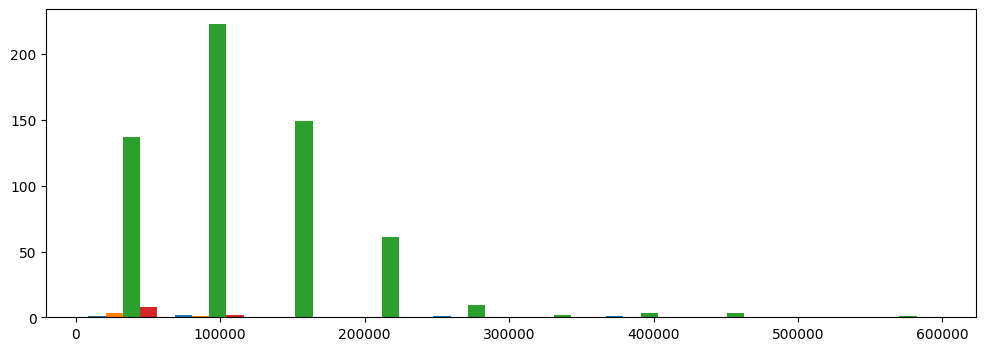

In [7]:
fig = plt.figure(figsize=(12, 4))
plt.hist([
    df[df.employment_type == 'CT'].salary_in_usd,
    df[df.employment_type == 'FL'].salary_in_usd,
    df[df.employment_type == 'FT'].salary_in_usd,
    df[df.employment_type == 'PT'].salary_in_usd,
])
plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\ex.3\graphics\employment_type_salary.png')
plt.show()

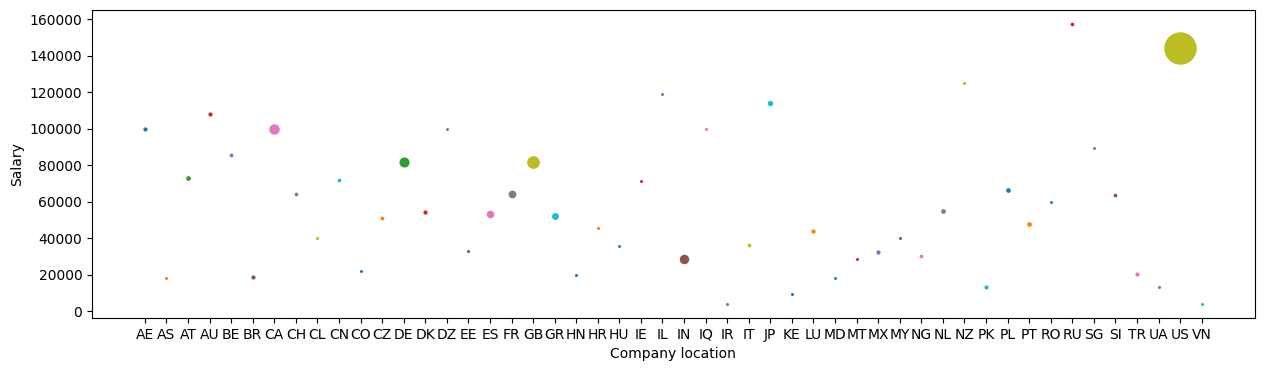

In [8]:
data = df.groupby('company_location', as_index=False).agg({'salary_in_usd': 'mean', 'company_size': 'count'})
data['scala'] = 500*(data['company_size'] / data['company_size'].max())
fig = plt.figure(figsize=(15, 4))
for location in data.company_location.unique():
    plt.scatter('company_location', 'salary_in_usd', s='scala', label=location, data=data[data.company_location == location])
plt.xlabel('Company location')
plt.ylabel('Salary')
plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\ex.3\graphics\salary_company_location.png')
plt.show()

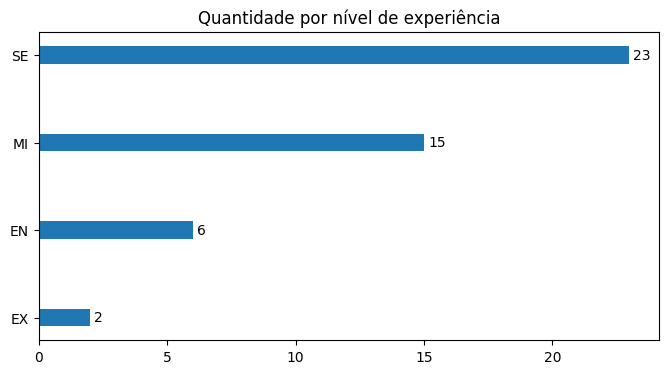

In [9]:
count_examples_per_experience_level = (target_salaries
    .groupby('experience_level', as_index=False)
    .salary_in_usd.count()
    .sort_values(by='salary_in_usd', ascending=False)
    .rename(columns={'salary_in_usd': 'count_examples'})
    .sort_values(by='count_examples', ascending=True))

fig = plt.figure(figsize=(8, 4))
bar1 = plt.barh('experience_level', 'count_examples', width, data=count_examples_per_experience_level)
plt.bar_label(bar1, padding=3)
plt.title('Quantidade por nível de experiência')
plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\ex.3\graphics\experience_level_count.png')
plt.show()

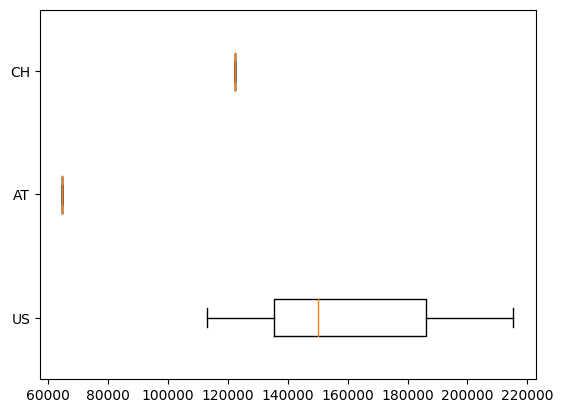

In [12]:
plt.boxplot([
    target_presential[target_presential.company_location == 'US'].salary_in_usd,
    target_presential[target_presential.company_location == 'AT'].salary_in_usd,
    target_presential[target_presential.company_location == 'CH'].salary_in_usd,
], vert=False)
plt.yticks([1, 2, 3], ['US', 'AT', 'CH'])
plt.savefig(r'C:\Users\biabr\OneDrive\Área de Trabalho\CEPEDI\ex.3\graphics\salary_company_location.png')
plt.show()